In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install graphviz 

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

import utils

np.random.seed(42)

In [8]:
data = pd.read_csv('data/Admission_Predict.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data['Admitted'] = data['Chance of Admit'] >= 0.75
data = data.drop(['Chance of Admit'], axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False


In [10]:
features = data.drop(['Admitted'], axis=1)
labels = data['Admitted']

In [11]:
dt = DecisionTreeClassifier()
dt.fit(features, labels)

DecisionTreeClassifier()

In [12]:
dt.predict(features[:5])

array([ True,  True, False,  True, False])

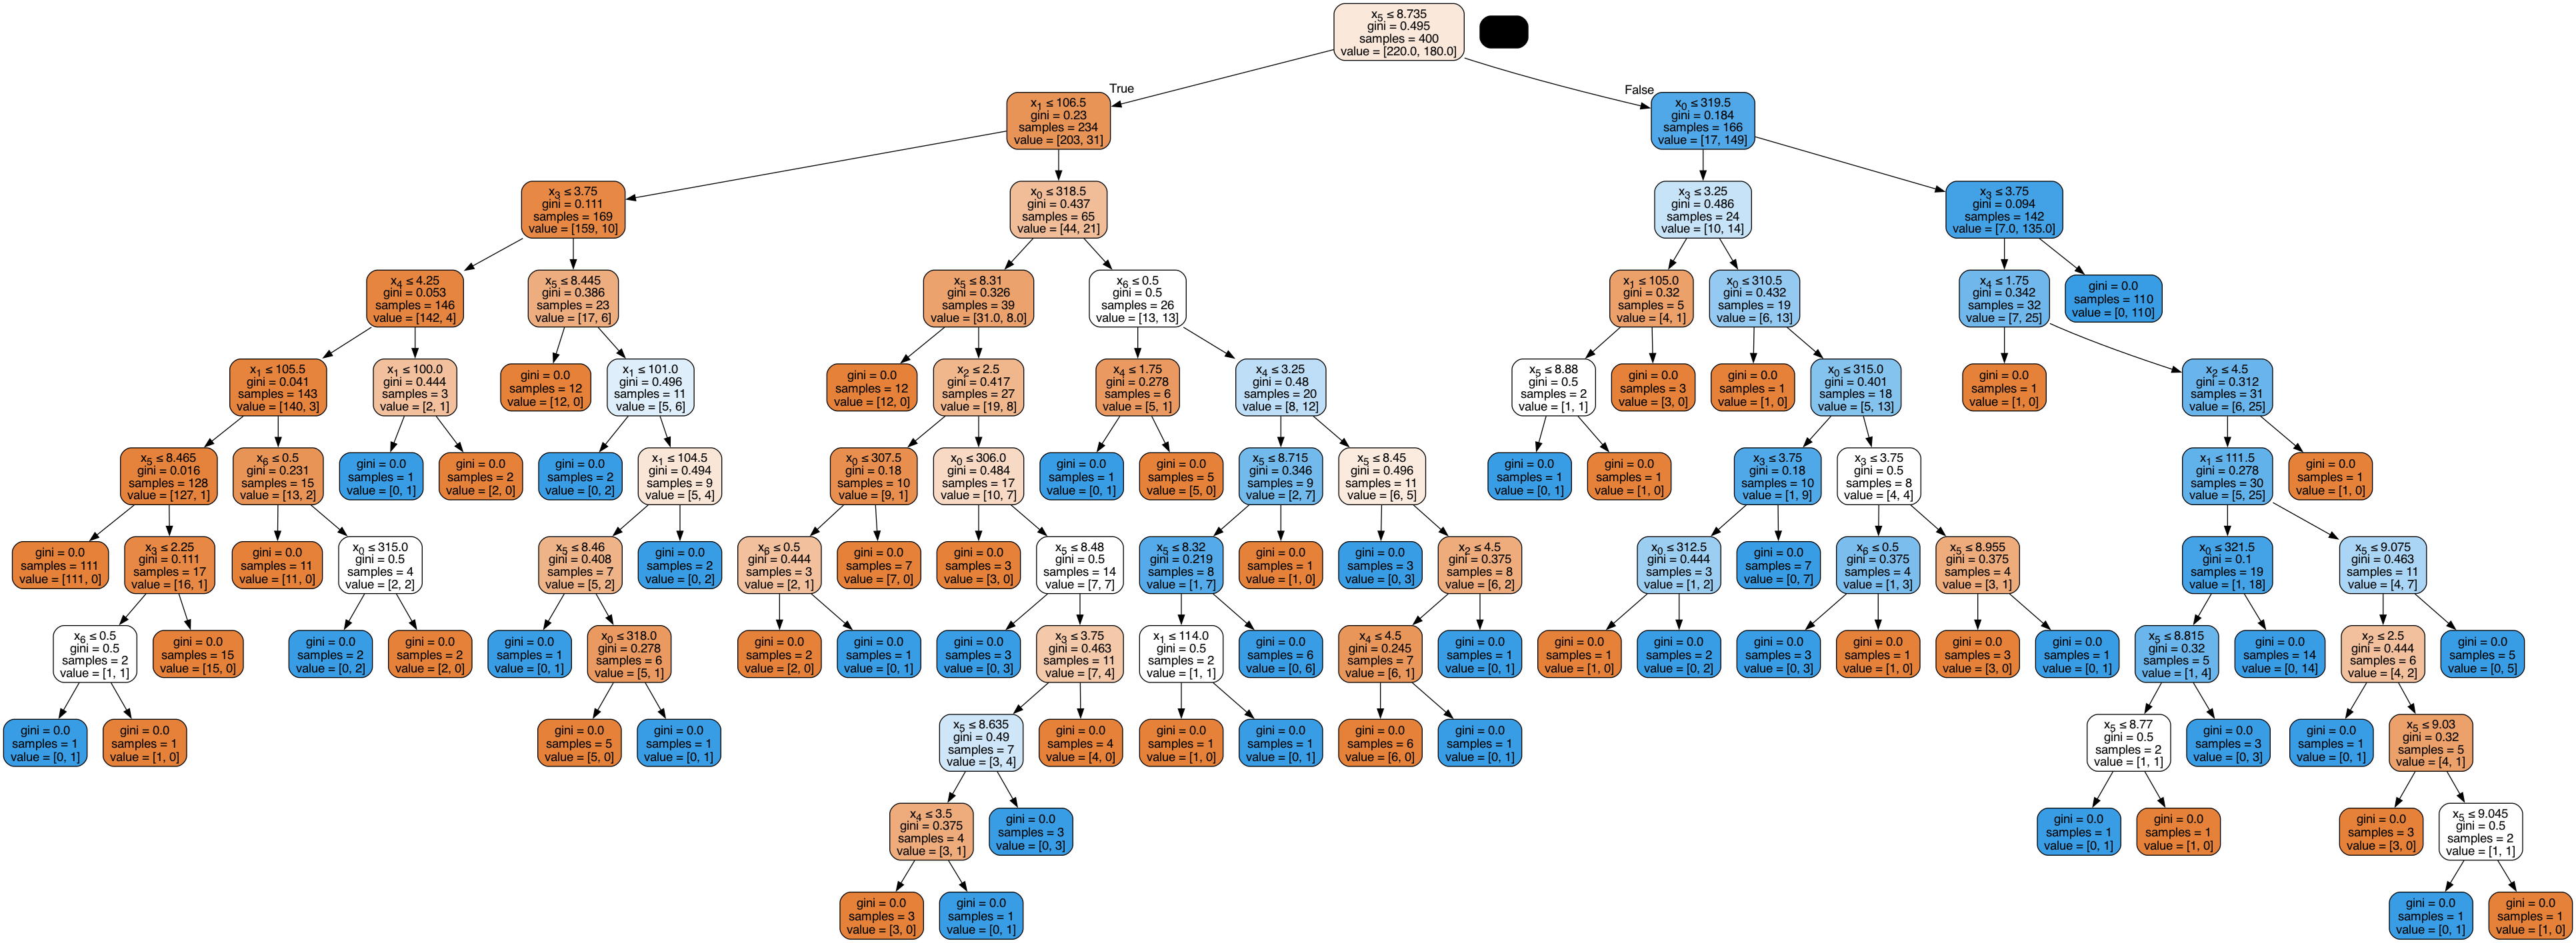

In [13]:
utils.display_tree(dt)

In [14]:
max_depth = 3
min_samples_leaf = 10
min_samples_split = 10

In [15]:
dt_smaller = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
dt_smaller.fit(features,labels)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

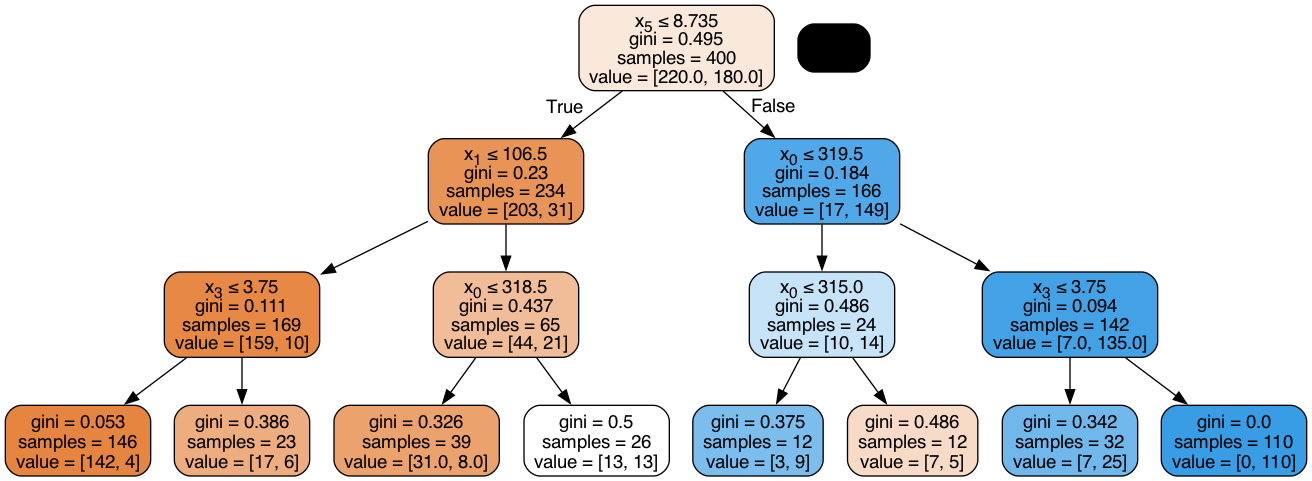

In [16]:
utils.display_tree(dt_smaller)

In [17]:
dt_smaller.predict([[320, 110, 3, 4.0, 3.5, 8.9, 0]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Decision tree for regression 

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
features = np.array([[10], [20], [30], [40], [50], [60], [70], [80]])
labels = np.array([7,5,7,1,2,1,5,4])

Text(0, 0.5, 'Дней в неделю')

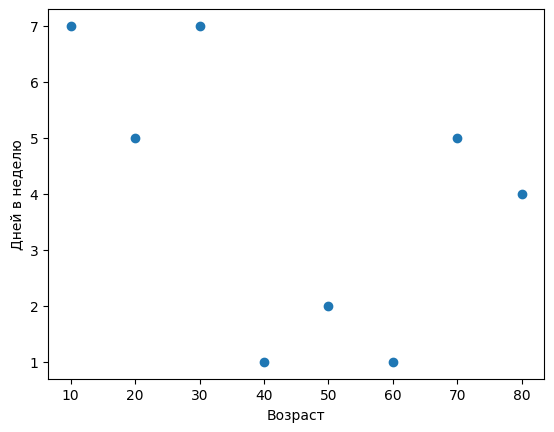

In [31]:
plt.scatter(features, labels)

plt.xlabel('Возраст')
plt.ylabel('Дней в неделю')

In [32]:
dt_regressor = DecisionTreeRegressor(max_depth=2)
dt_regressor.fit(features, labels)

DecisionTreeRegressor(max_depth=2)

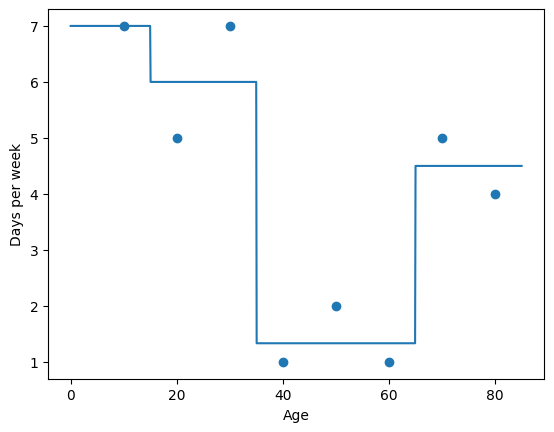

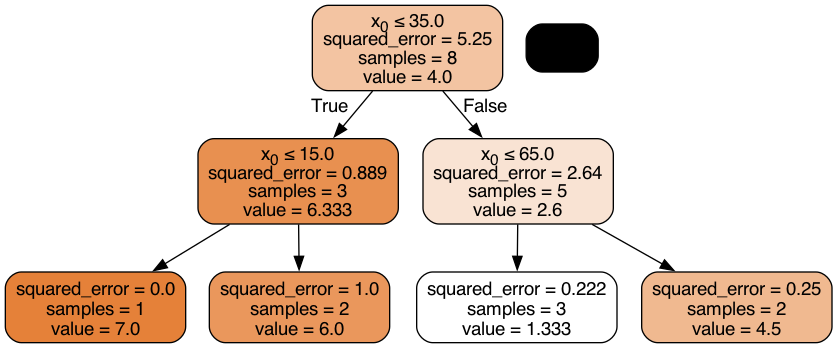

In [33]:
utils.plot_regressor(dt_regressor, features, labels)
utils.display_tree(dt_regressor)